In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
def plotar_conexoes(a):
    node_radius = 0.15 
    n = len(a)
    for servidor in range(n):
        plt.figure(figsize=(8, 3))
        for i in range(n):
            plt.plot(i, 0, 'o', markersize=30, color='lightblue') 
            plt.text(i, 0, str(i), ha='center', va='center', fontweight='bold')
        for destino in range(n):
            peso = a[servidor][destino]
            if peso == 0:
                continue
            cor = 'green' if peso > 0 else 'red' 
            if servidor == destino:
                plt.annotate(
                    "",
                    xy=(servidor, 0),
                    xytext=(servidor, 0),
                    arrowprops=dict(
                        arrowstyle='->',
                        color=cor,
                        shrinkA=0,
                        shrinkB=0,
                        connectionstyle="arc3,rad=0.3",
                        lw=2
                    )
                )
                plt.text(servidor, 0.25, str(peso), ha='center', color=cor, 
                         bbox=dict(facecolor='white', edgecolor='none', pad=2))
            else:
                plt.annotate(
                    "",
                    xytext=(servidor + node_radius, 0),
                    xy=(destino - node_radius, 0), 
                    arrowprops=dict(
                        arrowstyle='->',
                        color=cor,
                        lw=2,
                        shrinkA=0,
                        shrinkB=0
                    )
                )
                pos_x = (servidor + destino) / 2
                if servidor == 0 and destino > 1:
                    pos_x += 0.4
                elif servidor > 1 and destino > servidor:
                    pos_x -= 0.4
                elif destino < n - 2 and servidor == n - 1:
                    pos_x -= 0.4
                elif destino == n - 1 and servidor == n - 1:
                    pos_x += 0.2
                offset = 0.15 if servidor < destino else -0.15
                plt.text(pos_x, offset, str(peso), ha='center', color=cor,
                         bbox=dict(facecolor='white', edgecolor='none', pad=2))
        
        plt.title(f'Conexões do Servidor {servidor}', fontsize=12, pad=2)
        plt.xlim(-0.5, n - 0.5)
        plt.ylim(-0.5, 0.5)
        plt.axis('off')
        plt.show()

In [104]:
def eliminacao_gauss(A, b):
    n = len(A)
    for i in range(n):
        if A[i][i] == 0:
            for k in range(i+1, n):
                if A[k][i] != 0:
                    A[i], A[k] = A[k], A[i]
                    b[i], b[k] = b[k], b[i] 
                    break
            else:
                raise ValueError(f"A matriz é singular, não é possível resolver o sistema para a linha {i}.")
        for k in range(i+1, n):
            fator = A[k][i] / A[i][i]
            for j in range(i, n):
                A[k][j] -= fator * A[i][j]
            b[k] -= fator * b[i]
    x = [0] * n
    for i in range(n-1, -1, -1):
        soma = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - soma) / A[i][i]
    return x

In [105]:
def metodo_jacobi(A, b, tol=1e-6, max_iter=100):
    n = len(A)
    x = [0] * n 
    x_novo = x[:]
    for _ in range(max_iter):
        for i in range(n):
            soma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_novo[i] = (b[i] - soma) / A[i][i]
        if max(abs(x_novo[i] - x[i]) for i in range(n)) < tol:
            return x_novo
        x = x_novo[:]
    return x_novo

In [106]:
def metodo_gauss_seidel(A, b, tol=1e-6, max_iter=100):
    n = len(A)
    x = [0] * n 
    for _ in range(max_iter):
        x_old = x[:]
        for i in range(n):
            soma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - soma) / A[i][i]
        if max(abs(x[i] - x_old[i]) for i in range(n)) < tol:
            return x
    return x

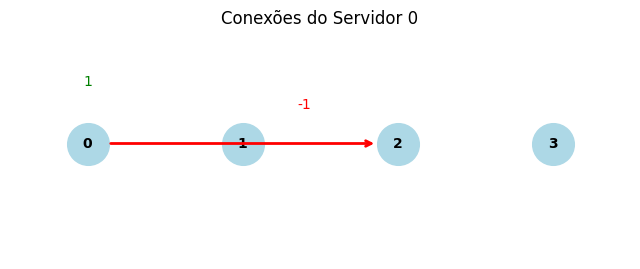

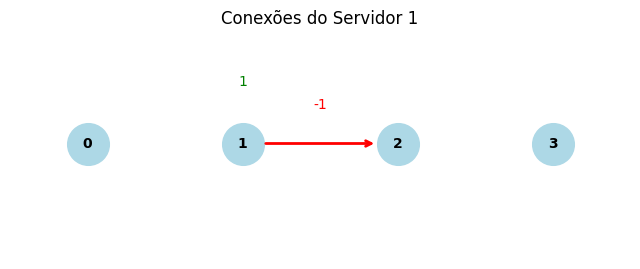

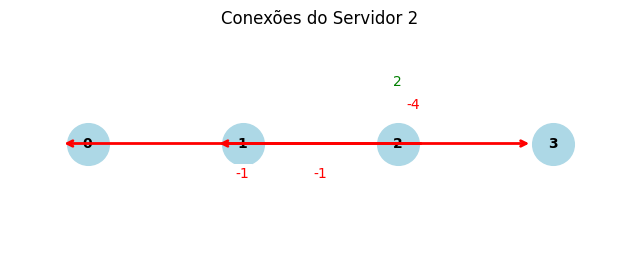

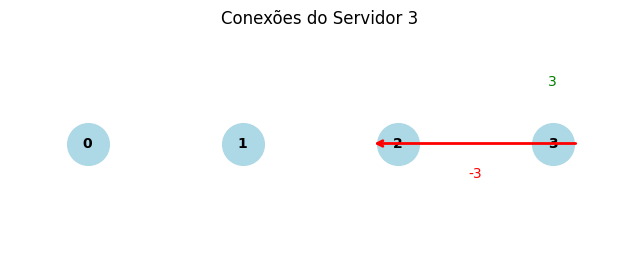

In [107]:
A = [[1, 0, -1, 0],[0, 1, -1, 0],[-1, -1, 2, -4],[0, 0, -3, 3]]
b = [2, 1, 4, 2]
plotar_conexoes(A)

In [87]:
print("Solução do sistema:", eliminacao_gauss(A, b))

Solução do sistema: [-0.4166666666666665, -1.4166666666666665, -2.4166666666666665, -1.75]


In [69]:
print("Solução pelo método de Jacobi:", metodo_jacobi(A, b))

Solução pelo método de Jacobi: [-0.4166666666666665, -1.4166666666666665, -2.4166666666666665, -1.75]


In [70]:
print("Solução pelo método de Gauss-Seidel:", metodo_gauss_seidel(A, b))

Solução pelo método de Gauss-Seidel: [-0.4166666666666665, -1.4166666666666665, -2.4166666666666665, -1.75]
